# Fourth assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1)\*, 1.2), 1.3), 2.1), 2.2), 2.3), 2.4), 3.1), 3.2), 3.3), 3.4)\*, 3.5)\*, 3.6)\*, 4.1), 4.2), 4.3), 4.4), 4.5), 5.1), 5.2), 5.3), 6.1)\*, 6.2)\* and 6.3)\*. After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami23 folder or subfolders.
- Do not override the original files in the ami23 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: June 06th, 2023, 23:55 hrs

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import halfnorm, lognorm
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.base import clone
from imblearn.over_sampling import RandomOverSampler

You will examine a dataset about superheroes. First the data will be loaded.

In [3]:
data = pd.read_csv('ass04_data.csv')
data['Height'] = pd.to_numeric(data.Height.str.split('//').str[1].str.split(' ').str[1])
data['Weight'] = pd.to_numeric(data.Weight.str.split('//').str[1].str.split(' ').str[1])
data.drop(columns=['Name', 'Skin color'], inplace=True)
data.head()

,Intelligence,Strength,Speed,Durability,Power,Combat,Alter Egos,Publisher,Alignment,Gender,Race,Height,Weight,Eye color,Hair color,Total Power
0,80,35,45,35,25,55,No,Marvel Comics,good,Male,NaN,188,90,Brown,Grey,275
1,75,100,20,80,25,65,No,Marvel Comics,good,Male,Human,203,441,Yellow,No Hair,365
2,95,30,35,65,100,85,No,Dark Horse Comics,good,Male,Icthyo Sapien,191,65,Blue,No Hair,410
3,80,90,55,65,100,65,No,DC Comics,good,Male,Ungaran,185,90,Blue,No Hair,455
4,85,80,55,90,65,95,Yes,Marvel Comics,bad,Male,Human / Radiation,203,441,Green,No Hair,470


## Task 1 - Pre-Processing

### Task 1.1* (Bonus)
When inspecting the dataset you will notice that there are a few categorical predictors where you have a lot of values that only appear a few times (e.g. there is only one hero that has "Rodian" as race). As they contain not that much information and will lead to a lot of predictors when we apply one-hot-encoding, we will merge these groups into one and simply assign them the value "other".

For the 4 predictors `Hair color`, `Eye color`, `Race` and `Publisher` have a look at how often the respective values appear and replace all values that occur less or equal frequent as the predictor's median with the new value `other` (For the median do not include the NaN entries). Keep all NaN values. Store the new DataFrame with all predictors in the variable `data_simple`. Name the new predictors `Hair color_simple`, `Eye color_simple`, `Race_simple` and `Publisher_simple` and drop the old ones.

Example:

A feature "color" has the following counts:
- green: 10
- blue: 8
- red: 4
- yellow: 1
- purple: 1

The median would be 4.

The new feature "color_simple" has then the following counts:
- green: 10
- blue: 8
- other: 6

In [48]:
# YOUR CODE HERE

data_simple.head()

,Intelligence,Strength,Speed,Durability,Power,Combat,Alter Egos,Alignment,Gender,Height,Weight,Total Power,Hair color_simple,Eye color_simple,Race_simple,Publisher_simple
0,80,35,44,35,26,55,No,good,Male,188,90,274,other,Brown,NaN,Marvel Comics
1,75,100,18,80,24,65,No,good,Male,203,441,365,No Hair,Yellow,Human,Marvel Comics
2,80,90,55,65,98,65,No,good,Male,185,90,454,No Hair,Blue,other,DC Comics
3,85,80,55,90,66,95,Yes,bad,Male,203,441,468,No Hair,Green,Human / Radiation,Marvel Comics
4,100,100,83,100,100,55,No,bad,Male,0,0,540,Black,Blue,Cosmic Entity,Marvel Comics


Since the next tasks will be based on this dataset, we provide you with a new and already adjusted dataset in case your result of task 1.1 is not correct (or you did not do it):

In [35]:
data_simple = pd.read_csv('ass04_data_simple.csv')
data_simple.head()

,Intelligence,Strength,Speed,Durability,Power,Combat,Alter Egos,Alignment,Gender,Height,Weight,Total Power,Hair color_simple,Eye color_simple,Race_simple,Publisher_simple
0,80,35,44,35,26,55,No,good,Male,188,90,274,other,Brown,NaN,Marvel Comics
1,75,100,18,80,24,65,No,good,Male,203,441,365,No Hair,Yellow,Human,Marvel Comics
2,80,90,55,65,98,65,No,good,Male,185,90,454,No Hair,Blue,other,DC Comics
3,85,80,55,90,66,95,Yes,bad,Male,203,441,468,No Hair,Green,Human / Radiation,Marvel Comics
4,100,100,83,100,100,55,No,bad,Male,0,0,540,Black,Blue,Cosmic Entity,Marvel Comics


### Task 1.2
Later we want to classify whether a superhero is good or bad. Therefore, we have to clean-up the alignment.

Drop all samples which `Alignment` is `neutral` and all rows where the `Alignment` is NaN.

Store the new DataFrame in the variable `data_aligned`.

In [38]:
# YOUR CODE HERE
data_cleaned = data_simple.dropna(subset=['Alignment'])

# Drop rows where Alignment is neutral
data_aligned = data_cleaned[data_cleaned['Alignment'] != 'neutral']

data_aligned.head()

,Intelligence,Strength,Speed,Durability,Power,Combat,Alter Egos,Alignment,Gender,Height,Weight,Total Power,Hair color_simple,Eye color_simple,Race_simple,Publisher_simple
0,80,35,44,35,26,55,No,good,Male,188,90,274,other,Brown,NaN,Marvel Comics
1,75,100,18,80,24,65,No,good,Male,203,441,365,No Hair,Yellow,Human,Marvel Comics
2,80,90,55,65,98,65,No,good,Male,185,90,454,No Hair,Blue,other,DC Comics
3,85,80,55,90,66,95,Yes,bad,Male,203,441,468,No Hair,Green,Human / Radiation,Marvel Comics
4,100,100,83,100,100,55,No,bad,Male,0,0,540,Black,Blue,Cosmic Entity,Marvel Comics


### Task 1.3
Split the data into `X_train`, `X_test`, `y_train` and `y_test` using the `train_test_split()`. As already mentioned, our target value **y** is the `Alignment`.

Test size should be 30% and the random state should be set to 1111.

In [39]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'data_aligned' with the target column 'Alignment'

# Splitting the data into features (X) and target (y)
X = data_aligned.drop('Alignment', axis=1)
y = data_aligned['Alignment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111)

## Task 2 - Building Pipeline

### Task 2.1
Build a `Pipeline()` that contains the pre-processing steps for our numerical predictors. Include:

- `SimpleImputer()` that is called *"num_imp"* and uses **mean** as strategy.
- `MinMaxScaler()` that is called *"num_sc"*.

Store the pipeline in the variable `pp_num`.

In [56]:
# YOUR CODE HERE


pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='mean')),
    ('num_sc', MinMaxScaler())
])

### Task 2.2
Build another `Pipeline()` that contains the pre-processing steps for our categorical predictors. Include:

- `SimpleImputer()` that is called *"cat_imp"* and uses **most_frequent** as `strategy`.
- `OneHotEncoder()` that is called *"cat_enc"* and drops the first category in each feature. Set `sparse_output` to **False** and `handle_unknown` to **"ignore"**.

Store the pipeline in the variable `pp_cat`.

In [57]:
# YOUR CODE HERE
pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='most_frequent')),
    ('cat_enc', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

### Task 2.3
Combine the pre-processing steps for the categorical and the numerical data using a `ColumnTransformer()`. As always, the numerical pipeline should be applied to numerical features and the categorical pipeline to categorical features. Store the column transformer in the variable `ct`.

In [58]:
num_feat = ['Intelligence', 'Strength','Speed','Durability','Power', 'Combat', 'Height', 'Weight', 'Total Power']
cat_feat = ['Alter Egos','Publisher_simple','Gender','Hair color_simple', 'Eye color_simple', 'Race_simple']

# YOUR CODE HERE
ct = ColumnTransformer([
    ('num_preprocessing', pp_num, num_feat),
    ('cat_preprocessing', pp_cat, cat_feat)
])

### Task 2.4
Set-up the whole pipeline that contains:

- The prepared `ColumnTransformer()` *"ct"*.
- `SVC()` that is called *"classifier"*. Set `max_iter` to **1.000.000**.

Store the pipeline in the variable `pip`.

In [59]:
# YOUR CODE HERE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


# Creating the pipeline
pip = Pipeline([
    ('ct', ct),
    ('classifier', SVC(max_iter=1000000))
])

print(pip)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_preprocessing',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer()),
                                                                  ('num_sc',
                                                                   MinMaxScaler())]),
                                                  ['Intelligence', 'Strength',
                                                   'Speed', 'Durability',
                                                   'Power', 'Combat', 'Height',
                                                   'Weight', 'Total Power']),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
           

## Task 3 - Grid Search

### Task 3.1
Build the parameter grid to be used with your pipeline in a grid search and store it in the variable `gs_param`.
Apply the following configurations:

- Use for the categorical SimpleImputer **most_frequent** and **constant** as `strategy`. In constant mode, set the `fill_value` to **"other"**.

- Use all possible `kernel`s for the classifier, except for the polynomial kernel.

- Vary the regularization parameter `C` for the classifier. Use **0.3, 0.4, 0.5, 0.7 and 1.0**.

- Vary the `gamma` coefficient for the classifier. Use **0.004, 0.005, 0.006, 0.01, 0.05, 0.1 and 0.5**.

In [77]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
gs_param = [
    {'ct__cat_preprocessing__cat_imp__strategy': ['most_frequent'],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__C': [0.3, 0.4, 0.5, 0.7, 1.0],
    'classifier__gamma': [0.004, 0.005, 0.006, 0.01, 0.05, 0.1, 0.5]},
    {'ct__cat_preprocessing__cat_imp__strategy': ['constant'],
    'ct__cat_preprocessing__cat_imp__fill_value': ['other'],
    'classifier__C': [0.3, 0.4, 0.5, 0.7, 1.0],
    'classifier__kernel': ['linear', 'rbf', 'sigmoid'],
    'classifier__gamma': [0.004, 0.005, 0.006, 0.01, 0.05, 0.1, 0.5]}
]



### Task 3.2
Let's build the `GridSearchCV()` object. Use the parameter grid from task 3.1. For the cross-validation, use a `StratifiedKFold()` validation with **5** splits, set `random_state` to **11** and **enable** the shuffling. To have access to the best model later, be sure that `refit` is set to **True**. Store the grid search object in the variable `gs`.

In [79]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Assuming you have the parameter grid defined as 'param_grid'

# Create StratifiedKFold with shuffling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

# Create the GridSearchCV object
gs = GridSearchCV(pip, gs_param, cv=cv, refit=True)

### Task 3.3
Fit the grid search using `X_train` and `y_train`.

In [80]:
# YOUR CODE HERE
gs.fit(X_train, y_train)


acc_train = gs.best_estimator_.score(X_train, y_train)
acc_test = gs.best_estimator_.score(X_test, y_test)

print(f"\nAccuracy on the train set: {acc_train}")
print(f"Accuracy on the test set: {acc_test}\n")
print(gs.best_params_)


Accuracy on the train set: 0.8739837398373984
Accuracy on the test set: 0.7122641509433962

{'classifier__C': 1.0, 'classifier__gamma': 0.5, 'classifier__kernel': 'rbf', 'ct__cat_preprocessing__cat_imp__strategy': 'most_frequent'}


### Task 3.4* (Bonus)
Build another parameter grid for a GridSearch, but now for a Random Forest. Store it in the variable `gs_param_rfc`. Apply the following configurations:
- For the number of trees (`n_estimators`) use the values: **100, 500, 1000**.
- For `max_features` use the values: **2, 4, 8**.
- For the `max_depth` use the values: **None, 4, 10, 16, 20**.
- Again, use for the categorical `SimpleImputer()` **most_frequent** and **constant** as `strategy`. In constant mode, set the `fill_value` to **"other"**.

Do not forget to create a new pipeline called `pip_rfc` with the `RFC` as classifier. Also, use the `random_state=12` for the `RFC`.

In [71]:
from sklearn.ensemble import RandomForestClassifier as RFC
# YOUR CODE HERE
pip_rfc = Pipeline([('ct', ct), ('classifier', RFC(random_state=12))])

gs_param_rfc=[ 
    {
        'ct__cat_preprocessing__cat_imp__strategy': ['most_frequent'],
        'classifier__n_estimators': [100, 500, 1000],
        'classifier__max_depth': [None, 4, 10, 16, 20],
        'classifier__max_features': [2, 4, 8]
    },
    {
        'ct__cat_preprocessing__cat_imp__strategy': ['constant'],
        'ct__cat_preprocessing__cat_imp__fill_value': ['other'],
        'classifier__n_estimators': [100, 500, 1000],
        'classifier__max_depth': [None, 4, 10, 16, 20],
        'classifier__max_features': [2, 4, 8]
    }]

### Task 3.5* (Bonus)
Build the `GridSearchCV` for the `RFC`. Use your parameter grid from task 3.5*. For the cross-validation, use `StratifiedKFold()` validation with **5** splits, set the `random_state` to **10** and **enable** the shuffling. To have access to the best model later, set `refit` to **True**. Store the grid search object in `gs_rfc`.

In [72]:
# YOUR CODE HERE
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# Create the GridSearchCV object
gs_rfc = GridSearchCV(pip_rfc, gs_param_rfc, cv=cv, refit=True)

### Task 3.6* (Bonus)
Once again, fit the grid search using `X_train` and `y_train`. Use your grid search object `gs_rfc`.

In [73]:
# YOUR CODE HERE
gs_rfc.fit(X_train, y_train.values.ravel())


acc_train_rfc = gs_rfc.best_estimator_.score(X_train, y_train)
acc_test_rfc = gs_rfc.best_estimator_.score(X_test, y_test)

print(f"\nAccuracy on the train set: {acc_train_rfc}")
print(f"Balanced Accuracy on the test set: {acc_test_rfc}\n")
print(gs_rfc.best_params_)


Accuracy on the train set: 1.0
Balanced Accuracy on the test set: 0.7264150943396226

{'classifier__max_depth': 20, 'classifier__max_features': 2, 'classifier__n_estimators': 100, 'ct__cat_preprocessing__cat_imp__fill_value': 'other', 'ct__cat_preprocessing__cat_imp__strategy': 'constant'}


## Task 4 - Baseline
You probably end up with an accuracy of around 71%. But how can you decide if that's good or bad?

It's time for building a dummy classifier to set a benchmark.

### Task 4.1
Instanciate a `DummyClassifier()` object provided by sklearn and assign it to the variable `dc`. With its default settings it will always return the same label, which is the one that is most common in the training data. Build a new pipeline `pip_dummy`. For the first step use the column tansformer from our fitted best estimator, you can access it using the `named_steps` property of `gs.best_estimator_`. Name it again *"ct"*. For the second step use the instanciated dummy classifier and name it *"classifier"*.

In [82]:
# YOUR CODE HERE
from sklearn.dummy import DummyClassifier

# Instantiate a DummyClassifier object
dc = DummyClassifier()

# Access the column transformer from the fitted best estimator
ct = gs.best_estimator_.named_steps['ct']

# Create a new pipeline with the column transformer and dummy classifier
pip_dummy = Pipeline([
    ('ct', ct),
    ('classifier', dc)
])

### Task 4.2
Now fit the new dummy pipeline on the training data `X_train` and `y_train`.

In [83]:
# YOUR CODE HERE
pip_dummy.fit(X_train, y_train)


acc_train_dummy = pip_dummy.score(X_train, y_train)
acc_test_dummy = pip_dummy.score(X_test, y_test)

print(f"\nAccuracy on the train set: {acc_train_dummy}")
print(f"Accuracy on the test set: {acc_test_dummy}\n")


Accuracy on the train set: 0.6971544715447154
Accuracy on the test set: 0.7122641509433962



### Task 4.3
Comparing the accuracy of our dummy classifier and our best SVC estimator from Task 3.3), you will notice an interesting behaviour. To further analyze this, let's have a look at the confusion matrices. Fill the provided subplot-grid in the following order:

- upper left plot: dummy classifier on training data
- upper right plot: dummy classifier on test data
- lower left plot: best estimator classifier on training data
- lower right plot: best estimator classifier on test data

_HINT: Remember, what is important about plots! titles, labels, scaling, axis..._

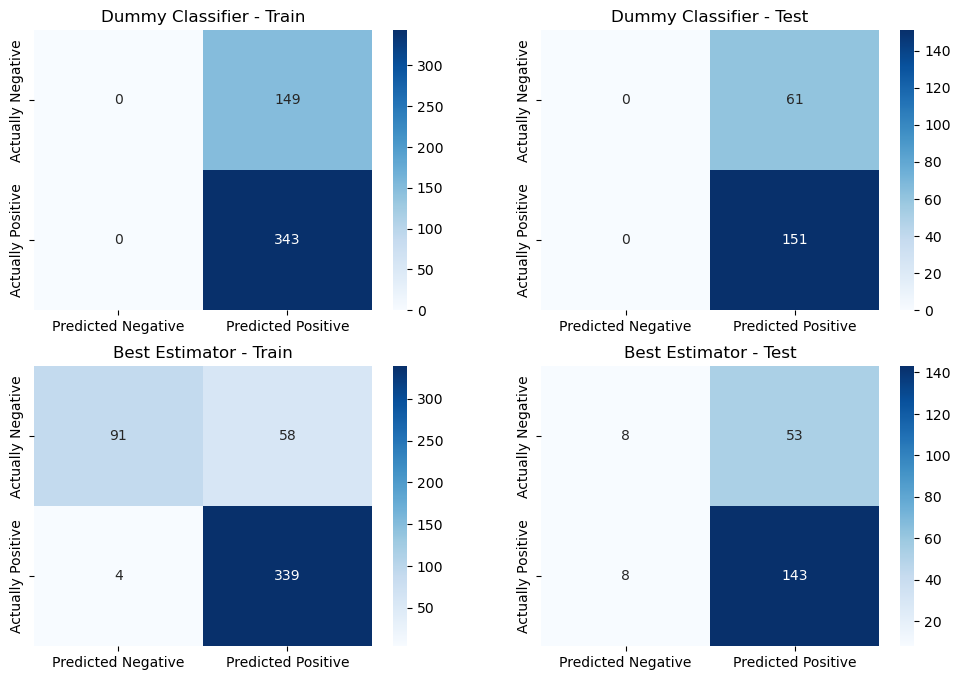

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# YOUR CODE HERE
dummy_train_preds = pip_dummy.predict(X_train)
dummy_test_preds = pip_dummy.predict(X_test)
best_estimator_train_preds = gs.best_estimator_.predict(X_train)
best_estimator_test_preds = gs.best_estimator_.predict(X_test)

# Compute confusion matrices
dummy_train_cm = confusion_matrix(y_train, dummy_train_preds)
dummy_test_cm = confusion_matrix(y_test, dummy_test_preds)
best_estimator_train_cm = confusion_matrix(y_train, best_estimator_train_preds)
best_estimator_test_cm = confusion_matrix(y_test, best_estimator_test_preds)

x_lb=['Predicted Negative','Predicted Positive']
y_lb=['Actually Negative','Actually Positive']

sns.heatmap(dummy_train_cm, annot=True, fmt="d", cmap="Blues", ax=axs[0, 0], xticklabels=x_lb, yticklabels=y_lb)
axs[0, 0].set_title("Dummy Classifier - Train")

# Upper right plot: Dummy classifier on test data
sns.heatmap(dummy_test_cm, annot=True, fmt="d", cmap="Blues", ax=axs[0, 1], xticklabels=x_lb, yticklabels=y_lb)
axs[0, 1].set_title("Dummy Classifier - Test")

# Lower left plot: Best estimator classifier on training data
sns.heatmap(best_estimator_train_cm, annot=True, fmt="d", cmap="Blues", ax=axs[1, 0], xticklabels=x_lb, yticklabels=y_lb)
axs[1, 0].set_title("Best Estimator - Train")

# Lower right plot: Best estimator classifier on test data
sns.heatmap(best_estimator_test_cm, annot=True, fmt="d", cmap="Blues", ax=axs[1, 1], xticklabels=x_lb, yticklabels=y_lb)
axs[1, 1].set_title("Best Estimator - Test")

plt.show()

### Task 4.4
Describe what problem/interesting behaviour you observe. What could be the reason? How could you overcome these issues and improve the best estimator?

YOUR ANSWER HERE


### Task 4.5
Compute the `balanced_accuracy_score()` metric for train and test sets for the best SVC pipeline from your grid-search in Task 3.3) and store the result to the variables `bacc_train` and `bacc_test`. Further compute the balanced accuracy for the dummy classifier and assign the results to `bacc_train_dummy` and `bacc_test_dummy`!

In [93]:
# YOUR CODE HERE
bacc_train_dummy = balanced_accuracy_score(y_train, pip_dummy.predict(X_train))
bacc_test_dummy = balanced_accuracy_score(y_test, pip_dummy.predict(X_test))
bacc_train = balanced_accuracy_score(y_train, gs.best_estimator_.predict(X_train))
bacc_test = balanced_accuracy_score(y_test, gs.best_estimator_.predict(X_test))

print(f"\nBalanced Accuracy on the train set best SVC: {bacc_train}", f"| Accuracy on the train set best SVC: {acc_train}")
print(f"Balanced Accuracy on the test set best SVC: {bacc_test}", f"| Accuracy on the test set best SVC: {acc_test}")
print(f"\nBalanced Accuracy on the train set Dummy: {bacc_train_dummy}", f"| Accuracy on the train set Dummy: {acc_train_dummy}")
print(f"Balanced Accuracy on the test set Dummy: {bacc_test_dummy}", f"| Accuracy on the test set Dummy: {acc_test_dummy}")


Balanced Accuracy on the train set best SVC: 0.799538223726691 | Accuracy on the train set best SVC: 0.8739837398373984
Balanced Accuracy on the test set best SVC: 0.5390837042666377 | Accuracy on the test set best SVC: 0.7122641509433962

Balanced Accuracy on the train set Dummy: 0.5 | Accuracy on the train set Dummy: 0.6971544715447154
Balanced Accuracy on the test set Dummy: 0.5 | Accuracy on the test set Dummy: 0.7122641509433962


## Task 5 - Oversampling

Random oversampling is a simple technique where we create random duplicates of the instances of the underrepresented class in an imbalanced data set. But, be careful with these kind of methods since overfitting might occur.<br>
In the following task you will investigate the potential improvement (or setback?) of the `RandomOverSampler()`. The `RandomOverSampler()` is part of the *imblearn* package. 

### Task 5.1

Instantiate a `RandomOverSampler()` object, use the variable name `ros`. Use the oversampling to create an altered version of the original training set. Store the new training data to `X_train_ros` and `y_train_ros`.

In [99]:
# YOUR CODE HERE
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

### Task 5.2
Use again your best SVC pipeline model from Task 3.3) copy it to a new variable called `clf_ros` and fit it to the new training set!<br>
_Hint: Take care that you do not overwrite your best SVC model from 3.3)! You might use sklearn's `clone()` function to clone your best SVC before fitting it to the new training data!_

In [100]:
# YOUR CODE HERE
clf_ros = clone(gs.best_estimator_)
clf_ros.fit(X_train_ros, y_train_ros)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_preprocessing',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer()),
                                                                  ('num_sc',
                                                                   MinMaxScaler())]),
                                                  ['Intelligence', 'Strength',
                                                   'Speed', 'Durability',
                                                   'Power', 'Combat', 'Height',
                                                   'Weight', 'Total Power']),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Alter Egos',
                                                   'Publisher_simple', 'Gender',
                                                   'Hair color_simple',
                                                   'Eye color_simple',
                                                   'Race_simple'])])),
                ('classifier', SVC(gamma=0.5, max_iter=1000000))])

### Task 5.3
Compute the `accuracy_score()` as well as the `balanced_accuracy_score()` metric for the new training set and the original test set using the freshly fitted `clf_ros` classifier from task 5.2 and store the result to the variables `acc_train_ros` and `acc_test_ros` as well as `bacc_train_ros` and `bacc_test_ros`.

In [105]:
# YOUR CODE HERE
y_train_ros_pred = clf_ros.predict(X_train_ros)
y_test_pred = clf_ros.predict(X_test)

acc_train_ros = clf_ros.score(X_train_ros, y_train_ros)
acc_test_ros = clf_ros.score(X_test, y_test)

bacc_train_ros = balanced_accuracy_score(y_train_ros, y_train_ros_pred)
bacc_test_ros = balanced_accuracy_score(y_test, y_test_pred)

print(f"\nBalanced Accuracy on the ros train set: {bacc_train_ros}", f"| Accuracy on the ros train set: {acc_train_ros}")
print(f"Balanced Accuracy on the test set : {bacc_test_ros}", f"| Accuracy on the test: {acc_test_ros}")


Balanced Accuracy on the ros train set: 0.9139941690962099 | Accuracy on the ros train set: 0.9139941690962099
Balanced Accuracy on the test set : 0.5182390619910976 | Accuracy on the test: 0.5990566037735849


## Task 6* (Bonus) - Class Weights
In task 5 you investigated the strategy of oversampling. Now we will see how the use of class weights will perform.
### Task 6.1* (Bonus)
Use again the best SVC pipeline from Task 3.3) as a starting point but now aditionally set the parameter `class_weight` of the `SVC()`to **balanced**!
Store the resultung pipeline to the variable `clf_w`!<br>
_Hint: Once again we will have to refit the model, so take care not to overwrite the original best SVC pipeline!_

In [108]:
# YOUR CODE HERE
clf_w = clone(gs.best_estimator_)
svc = clf_w.named_steps['classifier']
svc.set_params(class_weight='balanced')
ct = clf_w.named_steps['ct']
clf_w = Pipeline([('ct', ct), ('classifier', svc)])

### Task 6.2* (Bonus)
Fit the new pipeline `clf_w` with the original train data (not the oversampled version from Task 5)!

In [109]:
# YOUR CODE HERE
clf_w.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num_preprocessing',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer()),
                                                                  ('num_sc',
                                                                   MinMaxScaler())]),
                                                  ['Intelligence', 'Strength',
                                                   'Speed', 'Durability',
                                                   'Power', 'Combat', 'Height',
                                                   'Weight', 'Total Power']),
                                                 ('cat_preprocessing',
                                                  Pipeline(steps=[('cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Alter Egos',
                                                   'Publisher_simple', 'Gender',
                                                   'Hair color_simple',
                                                   'Eye color_simple',
                                                   'Race_simple'])])),
                ('classifier',
                 SVC(class_weight='balanced', gamma=0.5, max_iter=1000000))])

### Task 6.3* (Bonus)
Compute the `accuracy_score()` as well as the `balanced_accuracy_score()` metric with the new pipeline `clf_w` on the original training set and the original test set and store the result to the variables `acc_train_w` and `acc_test_w` as well as `bacc_train_w` and `bacc_test_w`.

In [110]:
# YOUR CODE HERE
bacc_train_w = balanced_accuracy_score(y_train, clf_w.predict(X_train))
bacc_test_w = balanced_accuracy_score(y_test, clf_w.predict(X_test))
acc_train_w = clf_w.score(X_train, y_train)
acc_test_w = clf_w.score(X_test, y_test)

print(f"\nBalanced Accuracy on the train set (class weights): {bacc_train_w}", f"| Accuracy on the train set (class weights): {acc_train_w}")
print(f"Balanced Accuracy on the test set (class weights): {bacc_test_w}", f"| Accuracy on the test (class weights): {acc_test_w}")


Balanced Accuracy on the train set (class weights): 0.9008452853816502 | Accuracy on the train set (class weights): 0.8882113821138211
Balanced Accuracy on the test set (class weights): 0.5510259472369992 | Accuracy on the test (class weights): 0.6179245283018868
